# 숙제, 생각

* 시퀀스 2 시퀀스 공부

* 어텐션 개념 공부

* 꼰대 챗봇은 어떨까  

> 착안점  
> (1) 마케팅 용도로 재밌게 쓰였던 서비스들이 생각난다.  


* 논문 보기

> 영어 논문  
> 영어로 발표된 논문은 책으로 발행되려면 1년, 한글로 번역되려면 1년이다.  
> 잡지처럼 읽히면 읽히는대로, 안읽히면 안읽히는대로  

* 모든 걸 다 알 필요는 없다.  
* 전체적인 구조를 파악하고, 어떻게 쓸지를 고민하면 된다.  


* 코드 공부 : analyz 하기  
* 한 줄 한 줄 주석 없이 해석해보기


* 1/16 마지막수업, 1/17 전체

In [ ]:
# 단순 반복 질문에 대한 처리

# 쇼핑몰 판매자용 챗봇
# 쇼핑몰 QNA에서 자료를 크롤링해와 이를 X와 레이블로 지정해서 학습
# -> 이것 검색 엔진에 불과할 확률이 높다.

# 범용 챗봇(이루다)와 전문 챗봇은 다르게 가야 함

# 강사님 생각

## 복붙에 대한 생각

* 자신이 작성했고, 이해한 코드는 복붙해도 괜찮다. 이해했기 때문에  
* 하지만, 남의 코드를 그대로 복붙하는 것은 좋지 않다.  
* 복붙해도 문제 없을 수도 있지만, 코드에 무관심해진다.  
* 그리고 그 코드에 대해 무지한 좋지 않은 상황에 처할 수 있다.  


## 워터폴 방식과 에자일 방식  

* 워터폴 : 하향식
* 에자일 : 일단 해보고 출시하고, 평가 및 반응 보고 보완해서 또 내놓고 반복
부트캠프 출신들은 워터폴에 익숙해져있다.  
하지만 실무에서 궁금한 것은, 과연 에자일스러운 경험이 있는지  
때문에, 에자일스러운 사람으로 보여야 한다.  



## 팀플에서 : 공감대 형성이 가장 중요함
* 자기 혼자 잘난 사람 - 좋지 않음.  
* 면접을 보았다, 이 때 면접관이 자신의 팀 이야기를 하면 붙은 것  
* 자신의 팀에 대한 소개와 공감을 원하는 것이기 때문.  


# 이론

## 시퀀스 2 시퀀스

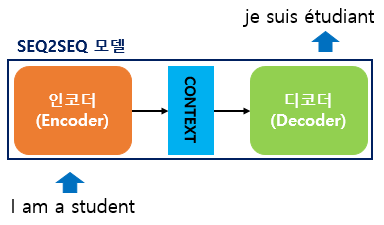  
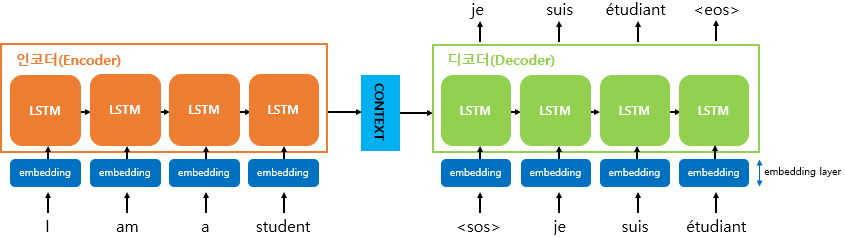  

* 가변길이를 가진다.  
Start ~ End로 가변길이를 가질 수 있다.  

## 어텐션

기존 RNN, LSTM에서는 '앞에 나온 것보다 뒤에 나온 것을 더 잘 기억하는(=가중치가 높은)' 문제점이 있다.
이게 아쉬워 나온 방법이 바로 어텐션

기존과 달리, '어텐션 레이어'라는 것을 추가하여
Sequence의 1번을 디코딩 출력할 때에는 Input의 1번을 불러와 강조하는 느낌이다.

시퀀스 투 시퀀스는 앞에 나온 단어를 쉽게 잊는다는 단점이 있다.

시퀀스 투 시퀀스의 문제점을 짚어 나온 개념이며
"자동차가 매연도 많고, 연료도 먹고… 그러면 엔진 빼!" 하는 느낌임

요즘에는 시퀀스 투 시퀀스는 저물어가고, 어텐션을 많이 사용하는 추세이다.

# 데이터 Import

In [3]:
import pandas as pd
from preprocess import * # 작성해준 함수 파일

PATH = './data_in/ChatBotData.csv'
VOCAB_PATH = './data_in/vocabulary.txt'

inputs, outputs = load_data(PATH) # inputs : 인코더 용, outputs : 디코더 용
char2idx, idx2char, vocab_size = load_vocabulary(PATH, VOCAB_PATH)

In [4]:
index_inputs, input_seq_len = enc_processing(inputs, char2idx)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx)
index_targets = dec_target_processing(outputs, char2idx)

In [5]:
data_config = {'char2idx':char2idx,
              'idx2char':idx2char,
              'vocab_size':vocab_size,
              'pad_symbol':PAD,
              'std_symbol':STD,
              'end_symbol':END,
              'unk_symbol':UNK}
              

In [6]:
# 데이터 저장

DATA_IN_PATH = 'data_in/'

TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGET = 'train_targets.npy'

DATA_CONFIGS = 'data_config.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS, 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGET, 'wb'), index_targets)
# 데이터 저장
# binary (이진) 파일로 저장

json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))
# json의 dump : 저장을 의미